In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer


from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel('dataset\Dataset Text.xlsx')

In [4]:
df.head()

,Kalimat,Label,Text
0,R1,supports,competition can effectively promote the develo...
1,R2,attacks,competition can effectively promote the develo...
2,R3,supports,what we acquired from team work is not only ho...
3,R4,supports,through cooperation children can learn about i...
4,R5,supports,all of these skills help them to get on well w...


In [134]:
df = df.drop(['Kalimat'],axis=1)

In [135]:
df.head()

,Label,Text
0,supports,competition can effectively promote the develo...
1,attacks,competition can effectively promote the develo...
2,supports,what we acquired from team work is not only ho...
3,supports,through cooperation children can learn about i...
4,supports,all of these skills help them to get on well w...


Text(0.5, 1.0, 'Label Data Distribution')

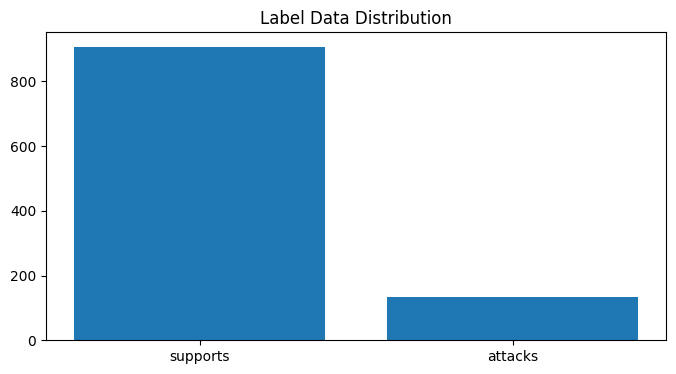

In [136]:
val_count = df.Label.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title('Label Data Distribution')

In [100]:
max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(df['Text'].values)
x = tokenizer.texts_to_sequences(df['Text'].values)
x = pad_sequences(x)

In [101]:
le = LabelEncoder()
y = le.fit_transform(df['Label'].values)

In [102]:
y = y.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(831, 71) (831, 1)
(208, 71) (208, 1)


batas suci

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)
y = y.reshape(-1,1)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
max_words = 200
max_len = 30
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(x_train)
sequences = tok.texts_to_sequences(x_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

# Mark

In [137]:
df['text_id'] = df['Label'].factorize()[0]
text_id_df = df[['Label', 'text_id']].drop_duplicates().sort_values('text_id')
text_to_id = dict(text_id_df.values)
id_to_text = dict(text_id_df[['text_id', 'Label']].values)
df.head()

,Label,Text,text_id
0,supports,competition can effectively promote the develo...,0
1,attacks,competition can effectively promote the develo...,1
2,supports,what we acquired from team work is not only ho...,0
3,supports,through cooperation children can learn about i...,0
4,supports,all of these skills help them to get on well w...,0


In [139]:
count_vect = CountVectorizer()
tfidf_transformer = TfidfTransformer()

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.Text).toarray()
labels = df.text_id
features.shape

(1039, 1386)

In [86]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [89]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, random_state = 42)


In [93]:
x_train.shape

(779, 1386)

In [88]:
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)

In [94]:
x_train_tfidf.shape

(779, 2)

In [ ]:
# models = [
#     RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
#     GaussianNB(),
#     LinearSVC(),
#     MultinomialNB(),
#     LogisticRegression(random_state=42),
# ]
# CV = 5
# cv_df = pd.DataFrame(index=range(CV * len(models)))
# entries = []
# for model in models:
#   model_name = model.__class__.__name__
#   accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
#   for fold_idx, accuracy in enumerate(accuracies):
#     entries.append((model_name, fold_idx, accuracy))
# cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
# import seaborn as sns
# sns.boxplot(x='model_name', y='accuracy', data=cv_df)
# sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
#               size=8, jitter=True, edgecolor="gray", linewidth=2)
# plt.show()

In [ ]:
# cv_df.groupby('model_name').accuracy.mean()

In [ ]:
# pred = model.fit(features, labels).predict(features)

Scikit-learn

In [103]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score

In [104]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    GaussianNB(),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=42),
]

target_models = ['RandomForestClassifier', 'GaussianNB', 'LinearSVC', 'MultinomialNB', 'LogisticRegression']
CV = 5
classification_reports = []
entries = []

for target_model in target_models:
    for model in models:
        model_name = model.__class__.__name__
        if model_name == target_model:
            accuracies = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=CV)

            avg_accuracy = np.mean(accuracies)
            predictions = model.fit(x_train, y_train).predict(x_test)

            report = classification_report(y_test, predictions, output_dict=True)
            entries.append((model_name, avg_accuracy, report))

In [ ]:
# for fold_idx, accuracy in enumerate(accuracies):
#     entries.append((model_name, fold_idx, accuracy))

#     # Calculate predictions for the current fold
#     predictions = model.fit(features, labels).predict(features)

#     # Calculate the classification report
#     report = classification_report(labels, predictions, output_dict=True)

#     # Add the classification report to the list
#     classification_reports.append((model_name, fold_idx, report))

In [ ]:
# report = classification_report(labels, pred, output_dict=True)

In [ ]:
# classification_report.append((model_name, fold_idx, report))

In [105]:
for model_name, avg_accuracy, report in entries:
    print(f"Classification Report for {model_name} - Average over all folds:\n")
    print(f"Average Accuracy: {avg_accuracy:.4f}\n")
    print(pd.DataFrame(report).transpose())
    print("\n")

Classification Report for RandomForestClassifier - Average over all folds:

Average Accuracy: 0.8724

              precision    recall  f1-score     support
0              0.000000  0.000000  0.000000   27.000000
1              0.870192  1.000000  0.930591  181.000000
accuracy       0.870192  0.870192  0.870192    0.870192
macro avg      0.435096  0.500000  0.465296  208.000000
weighted avg   0.757235  0.870192  0.809793  208.000000


Classification Report for GaussianNB - Average over all folds:

Average Accuracy: 0.1781

              precision    recall  f1-score     support
0              0.139175  1.000000  0.244344   27.000000
1              1.000000  0.077348  0.143590  181.000000
accuracy       0.197115  0.197115  0.197115    0.197115
macro avg      0.569588  0.538674  0.193967  208.000000
weighted avg   0.888258  0.197115  0.156668  208.000000


Classification Report for LinearSVC - Average over all folds:

Average Accuracy: 0.6956

              precision    recall  f1-score

In [30]:
x_train_tf, x_test_tf, y_train_tf, y_test_tf = train_test_split(features, labels, random_state = 42, test_size=0.2)

In [65]:
display(print(f'Train shape : {features.shape}'), print(f'Test shape : {labels.shape}'))

Train shape : (1039, 1386)
Test shape : (1039,)


None

None

In [33]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [60]:
GLOVE_EMB = 'F:\Zaidan codes\Big Data NLP Project\glove.6B\glove.6B.50d.txt'
EMBEDDING_DIM = 128     #300
LR = 1e-3
BATCH_SIZE = 64
EPOCHS = 10

In [59]:
embeddings_index = {}

f = open(GLOVE_EMB, encoding='utf8')
for line in f:
    values = line.split()
    word = value = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


Tensorflow

In [123]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
word_index = tokenizer.word_index

In [124]:
embedding_matrix = np.zeros((500, 300))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [125]:
embedding_layer = tf.keras.layers.Embedding(500, 300,
                                          weights=[embedding_matrix],
                                          input_length=1386,
                                          trainable=False)

In [126]:
sequence_input = Input(shape=input_features, dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)                                #64 128
x = Bidirectional(LSTM(196, dropout=0.2, recurrent_dropout=0.2))(x)     #64 128
x = Dense(512, activation='relu')(x)                                    #512 256
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)                                    #512 128    
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [127]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 71)]              0         
                                                                 
 embedding_11 (Embedding)    (None, 71, 300)           150000    
                                                                 
 spatial_dropout1d_11 (Spati  (None, 71, 300)          0         
 alDropout1D)                                                    
                                                                 
 conv1d_1 (Conv1D)           (None, 67, 64)            96064     
                                                                 
 bidirectional_1 (Bidirectio  (None, 392)              409248    
 nal)                                                            
                                                                 
 dense_13 (Dense)            (None, 512)               2012

In [128]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 2)

In [129]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Training on CPU...


In [130]:
history = model.fit(features, labels, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[ReduceLROnPlateau])

Epoch 1/10


ValueError: in user code:

    File "C:\Users\zaida\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\zaida\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\zaida\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\zaida\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\zaida\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\zaida\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_1" is incompatible with the layer: expected shape=(None, 71), found shape=(None, 1386)


In [43]:
print('Loss and Accuracy Score :', model.evaluate(x_test_tf, y_test_tf))

7/7 [==============================] - 3s 398ms/step - loss: 0.6442 - accuracy: 0.8702
Loss and Accuracy Score : [0.6441831588745117, 0.870192289352417]


In [46]:
y_pred_tf = model.predict(x_test_tf, batch_size=BATCH_SIZE)
print(classification_report(y_test_tf, y_pred_tf.round()))

4/4 [==============================] - 3s 822ms/step
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       181
           1       0.00      0.00      0.00        27

    accuracy                           0.87       208
   macro avg       0.44      0.50      0.47       208
weighted avg       0.76      0.87      0.81       208



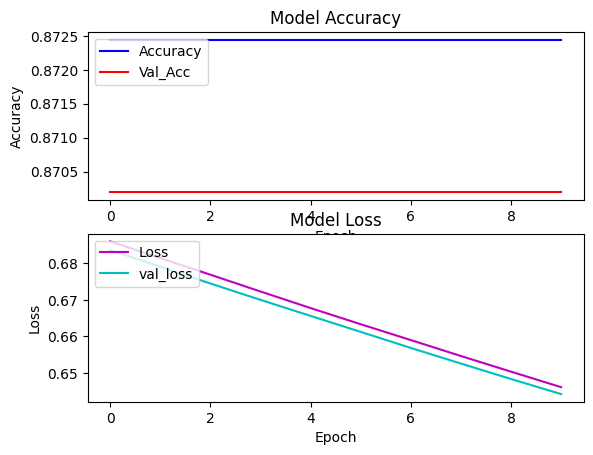

In [47]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('Model Accuracy')
at.set_ylabel('Accuracy')
at.set_xlabel('Epoch')
at.legend(['Accuracy', 'Val_Acc'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('Model Loss')
al.set_ylabel('Loss')
al.set_xlabel('Epoch')
al.legend(['Loss', 'val_loss'], loc = 'upper left')

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding

In [35]:
features.shape

(1039, 1386)

In [110]:
input_features = x_train.shape[1]

In [111]:
input_features

71

In [ ]:
embed_dim = 128     #128
lstm_out = 196

model = Sequential()
model.add(Embedding(, embed_dim,input_length = input_features))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

In [ ]:
batch_size = 32
model.fit(features, labels, epochs = 10, batch_size=batch_size)